## Regulation of ion transport from within ion transit pathways
-------------

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

### Detail

In [63]:
C0 = 1.5*1e-3
N0 = 140*1e-3
Ci = 0.02*1e-6
Ni = 5*1e-3
Kcx = 0.05*1e-3
Knx = 20*1e-3
Em = 60*1e-3
Kncx = 2600*1e-12

#### Differential Equations


$D_{o} = \frac{C_{0}}{K_{cx}}+1+\frac{N_{0}}{K_{nx}}\times (1+\frac{N_{0}}{K{nx}}\times (1+\frac{N_{0}}{K_{nx}}))$

$D_{i} = \frac{C_{i}}{K_{cx}}+1+\frac{N_{i}}{K_{nx}}\times (1+\frac{N_{i}}{K{nx}}\times (1+\frac{N_{i}}{K_{nx}}))$

$F_{co} = \frac{\frac{C_{0}}{K_{cx}}}{D_{0}}$

$F_{3no} = \frac{\frac{N_{0}^{3}}{K_{nx}^{3}}}{D_{0}}$

$F_{ci} = \frac{\frac{C_{i}}{K_{cx}}}{D_{i}}$

$F_{3ni} = \frac{\frac{N_{i}^{3}}{K_{nx}^{3}}}{D_{i}}$

$K_{em} = exp(0.25 \times \frac{E_{m}}{26})$

$E_{2} = \frac{(\frac{F_{ci}}{K_{em}}+F_{3ni}\times {K_{em}})}{(\frac{F_{ci}}{K_{em}}+F_{3ni}\times{K_{em}}+{F_{co}}\times{K_{em}}+\frac{F_{3no}}{K_{em}})}$
$E_{1} = 1-E{2}$


$E_{1} = 1-E{2}$

$I_{ncx} = (\frac{F_{co}\times K_{em}\times E_{2}-F_{ci}}{K_{em}\times E_{1}})\times K_{ncx}$

### Calculation

In [64]:
D0 = (C0/Kcx)+1+(N0/Knx)*(1+(N0/Knx)*(1+(N0/Knx)))
Di = (Ci/Kcx)+1+(Ni/Knx)*(1+(Ni/Knx)*(1+(Ni/Knx)))
Fco = (C0/Kcx)/D0
F3no = (N0**3/Knx**3)/D0
Fci = (Ci/Kcx)/Di
F3ni = (Ni**3/Knx**3)/Di
Kem = np.exp(0.25*Em/26)

In [65]:
k = {"Fci":Fci,"Kem":Kem,"F3ni":F3ni,"Fco":Fco,"F3no":F3no}

In [66]:
# function that returns dy/dt
def model(y,t,k):
    
    '''y = E2,
    '''
    
    dydt = (k['Fci']/k['Kem'] \
           +k['F3ni']*k['Kem'])/((k['Fci']/k['Kem'])\
           +k['F3ni']*k['Kem'] + k['Fco']*k['Kem']\
           + k['F3no']/k['Kem'])
    
    
    return dydt

In [67]:
N = 1
T = 50
y0 = [1]
t = np.linspace(0,T)

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))

E1 = np.empty_like(t)
E2 = np.empty_like(t)
I =  np.empty_like(t)
for i in range(len(t)):
    E2[i] = y[i]
    E1[i] = 1-E2[i]
    
    I[i] = (Fco*Kem*E2[i]-Fci/Kem*E1[i])*Kncx

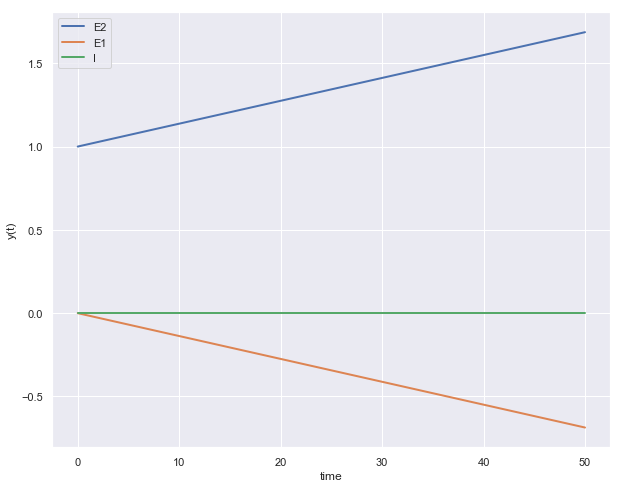

In [68]:
# plot results
plt.figure(figsize = [10,8])
plt.plot(t,E2,linewidth=2,label='E2')
plt.plot(t,E1,linewidth=2,label='E1')
plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Rough

In [8]:
N = 1
T = 50
y0 = [1,0,0]
t = np.linspace(0,T)

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))

y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)
I =  np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = 1 - y1[i] - y2[i] - y3[i] 
    I[i] = y2[i]*F_3n

In [9]:
y1[T-1],y2[T-1],y3[T-1],y4[T-1],I[T-1]

(5.014955054667541e-05,
 5.407977907554697e-07,
 0.019835680478156214,
 0.9801136291735063,
 5.344296471883424e-07)

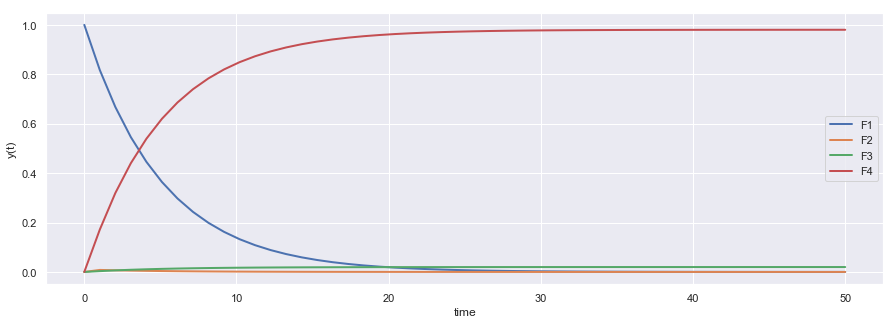

In [10]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='F1')
plt.plot(t,y2,linewidth=2,label='F2')
plt.plot(t,y3,linewidth=2,label='F3')
plt.plot(t,y4,linewidth=2,label='F4')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

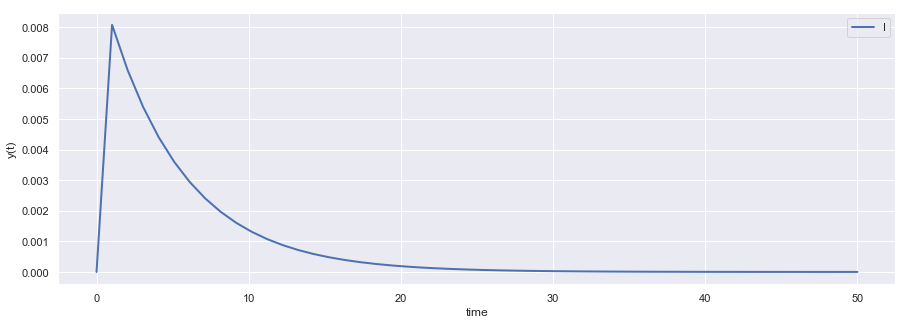

In [11]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Simulation

In [26]:
PTC = [{"Ni":0*1e-3,"Ci": 2*1e-6},\
       {"Ni":100*1e-3,"Ci": 2*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6},\
       {"Ni":100*1e-3,"Ci": 0*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6},\
       {"Ni":100*1e-3,"Ci": 2*1e-6},\
       {"Ni":100*1e-3,"Ci": 0*1e-6},\
       {"Ni":100*1e-3,"Ci": 2*1e-6},\
       {"Ni":100*1e-3,"Ci": 0*1e-6},\
       {"Ni":0*1e-3,"Ci": 2*1e-6},\
       {"Ni":100*1e-3,"Ci": 0*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6},\
       {"Ni":100*1e-3,"Ci": 0*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6},\
       {"Ni":100*1e-3,"Ci": 2*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6}]

In [37]:
PTCt = [{"Ni":0*1e-3,"Ci": 2*1e-6},\
       {"Ni":100*1e-3,"Ci": 2*1e-6},\
       {"Ni":0*1e-3,"Ci": 0*1e-6}]

In [38]:
len(PTC)

16

In [45]:
Tc = 50
TT = [i*Tc for i in range(len(PTC))]

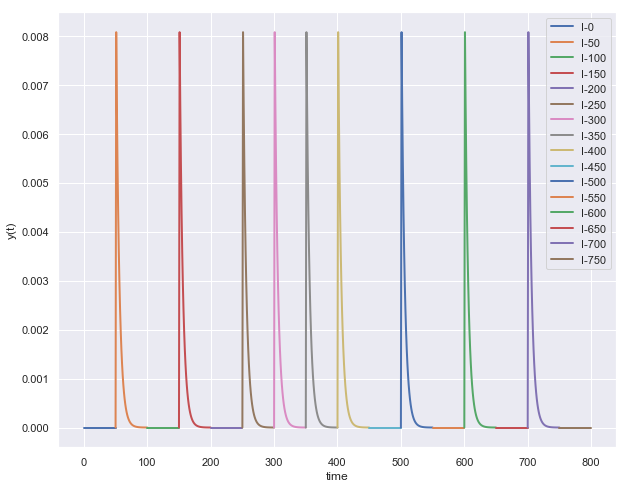

In [46]:
plt.figure(figsize = [10,8])
for i,T in enumerate(TT):
    
    ptc = PTC[i]
    Ni = ptc['Ni']
    Ci = ptc['Ci']
    
    F_3n = Ni**2.5/(Ni**2.5 + (17*1e-3)**2.5)
    K_con1 = 0.1*1e-6
    K_con2 = 20
    K_coff1 = 0.05*1e-6
    K_coff2 = 0.3
    K_12 = 0.2
    K_43 = 0.1
    K_inact1 = 0.2
    K_inact2 = 25*K_inact1
        
    k = {"Ni": Ni,"Ci":Ci, "F_3n": F_3n,\
     "K_con1": K_con1,"K_con2":K_con2,\
     "K_coff1":K_coff1,"K_coff2": K_coff2,\
     "K_12": K_12,"K_43":K_43,"K_inact1": K_inact1,\
     "K_inact2": K_inact2}

    y0 = [1,0,0]
    t = np.linspace(T,T+Tc)
    '''solve ODEs'''
    y = odeint(model,y0,t,args=(k,))

    y1 = np.empty_like(t)
    y2 = np.empty_like(t)
    y3 = np.empty_like(t)
    y4 = np.empty_like(t)
    I =  np.empty_like(t)
    for i in range(len(t)):
        y1[i] = y[i][0]
        y2[i] = y[i][1]
        y3[i] = y[i][2]
        y4[i] = 1 - y1[i] - y2[i] - y3[i] 
        I[i] = y2[i]*F_3n
        
    y0 = [y1[Tc-1],y2[Tc-1],y3[Tc-1]]
        
    '''Plot the simulation'''
    plt.plot(t,I,linewidth=2,label='I-'+str(T))
    plt.xlabel('time')
    plt.ylabel('y(t)')
    plt.legend()
plt.show()